# Principal Component Analysis

## import library

In [175]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

In [176]:
print("집에서 다시")

집에서 다시


## load data

In [177]:
fname_data  = 'assignment_12_data.txt'
feature0    = np.genfromtxt(fname_data, delimiter=',')

number_data     = np.size(feature0, 0)
number_feature  = np.size(feature0, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 50
number of feature : 2


## plot the input data

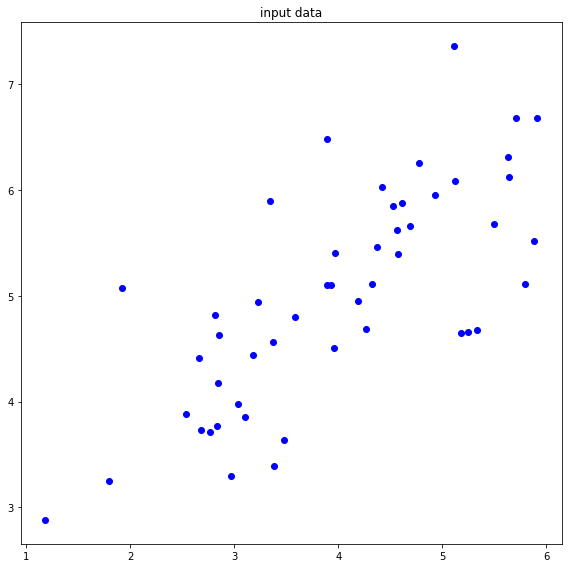

In [178]:
plt.figure(figsize=(8,8))   
plt.title('input data')

x0 = feature0[:,0] # x 
y0 = feature0[:,1] # y 

plt.scatter(x0, y0, color='blue')

plt.tight_layout()
plt.show()

## Normalization (Z-scoring)
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [179]:
def normalize(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    mean0 = np.mean(feature[:,0])
    mean1 = np.mean(feature[:,1])
    standard0 = np.std(feature[:,0])
    standard1 = np.std(feature[:,1])

    feature[:,0] = (feature[:,0]-mean0) / standard0
    feature[:,1] = (feature[:,1] - mean1) / standard0
    feature_normalize = feature 


    # x = feature[:,0]
    # y = feature[:,1]
    # meanx = np.mean(x)
    # meany = np.mean(y)

    # standardx = np.std(x)
    # standardy = np.std(y)

    # x = (x - meanx) / standardx 
    # y = (y - meany) / standardy 
    # feature_normalize = np.stack([x,y],axis=1)   
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return feature_normalize

In [180]:
feature = normalize(feature0)

x   = feature[:, 0]
y   = feature[:, 1]

min_x = np.min(x)
min_y = np.min(y)

max_x = np.max(x)
max_y = np.max(y)

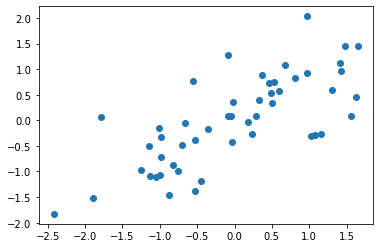

In [181]:
print(plt.scatter(feature0[:,0],feature0[:,1]))


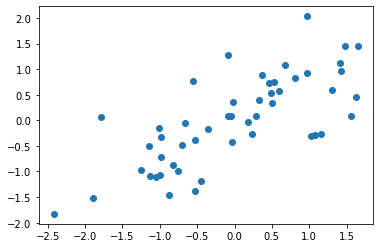

In [182]:
print(plt.scatter(feature[:,0],feature[:,1]))

## compute covariance matrix
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [183]:
def compute_covariance(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    feature = feature.T
    cov = np.transpose(feature) # Transpose
    Sigma = (1 / number_data) * np.dot(cov,feature)


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return Sigma

## compute principal components
- `np.linalg.eig`
- `argsort()`
- return the eigenvalues and the eigenvectors in a decreasing order according to the eigenvalues

In [195]:
def compute_principal_component(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    z = feature.T
    Sigma = compute_covariance(z)

    s, u = np.linalg.eig(Sigma)
    principal_component_1 = np.dot(u[:,0],s[0])
    principal_component_2 = np.dot(u[:,1],s[1])

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
     
    return (principal_component_1, principal_component_2)

## compute the projection of point onto the axis
- `np.matmul`
- `np.dot`
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features
- shape of vector = $m \times 1$ where $m$ is the dimension of features

In [196]:
def compute_projection_onto_line(feature, vector):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    projection = [] 

    for index in range(len(feature)):
        f= np.array([feature[index][0],feature[index][1]])
        #print("f shape :",f.shape)
        projection.append((np.dot(f, vector) / np.dot(vector, np.transpose(vector))) * vector)
        
    projection = np.array(projection)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return projection



## compute the principal components and the projection of feature

In [197]:

(principal_component_1, principal_component_2) = compute_principal_component(feature)

projection1 = compute_projection_onto_line(feature, principal_component_1)
projection2 = compute_projection_onto_line(feature, principal_component_2)

---

---

## functions for presenting the results

---

---

In [198]:
def function_result_01():
   
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')
    plt.scatter(x, y, color='blue')

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

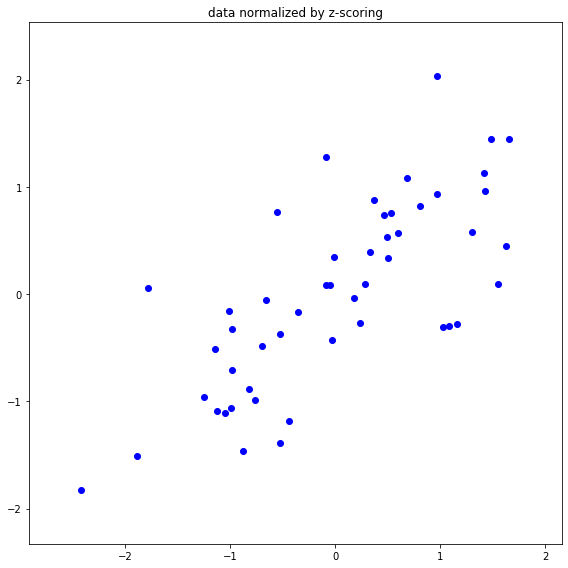

In [199]:
function_result_01()

In [235]:
def function_result_02():

    plt.figure(figsize=(8,8))
    plt.title('principal components')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    
    axes = plt.subplot(111)
    #plt.title('principal directions')

    axes.annotate('', xy=(principal_component_1[0],principal_component_1[1]), xytext = (0, 0), arrowprops=dict(facecolor='red', edgecolor="red"))
    axes.annotate('', xy=(principal_component_2[0],principal_component_2[1]), xytext = (0, 0), arrowprops=dict(facecolor='green', edgecolor="green"))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)
    plt.scatter(x,y,c='blue')
    plt.tight_layout()
    plt.show()

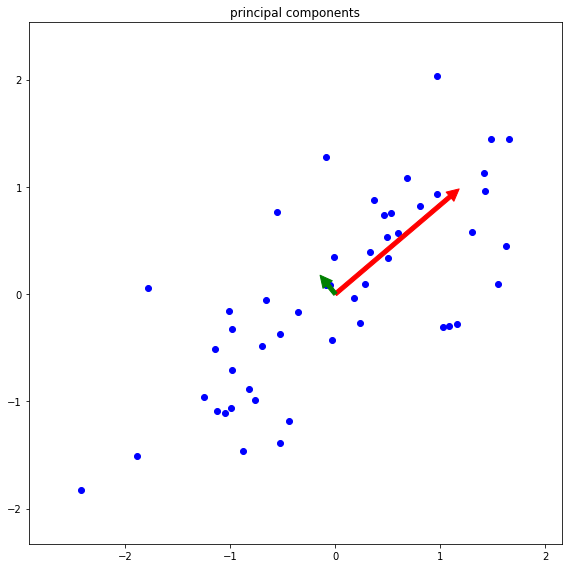

In [236]:
function_result_02()

In [202]:
def function_result_03():

    plt.figure(figsize=(8,8))
    plt.title('first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    axes = plt.subplot(111)
    plt.scatter(x,y,c = 'blue')


    x_value = [0,principal_component_1[0]]
    y_value = [0,principal_component_1[1]]

    x_lim = axes.get_xlim()
    y_lim = axes.get_ylim()
    
    x_extt = np.linspace(x_lim[0],x_lim[1],100)
    poly = np.polyfit(x_value,y_value,deg=1) 
    y_extt = np.poly1d(poly)(x_extt)

    axes.plot(x_extt,y_extt,'r')
    

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

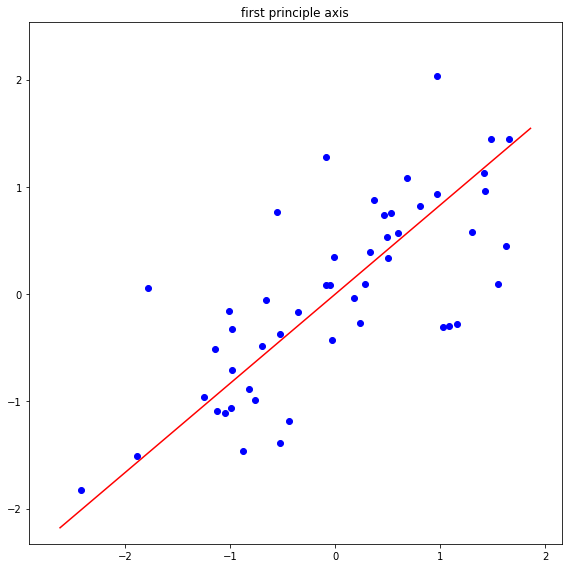

In [203]:
function_result_03()

In [204]:
def function_result_04():

    plt.figure(figsize=(8,8))
    plt.title('second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    axes = plt.subplot(111)
    plt.scatter(x,y,c = 'blue')
    
    x_value = [0,principal_component_2[0]]
    y_value = [0,principal_component_2[1]]

    x_lim = axes.get_xlim()
    y_lim = axes.get_ylim()
    
    x_extt = np.linspace(x_lim[0],x_lim[1],100)
    poly = np.polyfit(x_value,y_value,deg=1) 
    y_extt = np.poly1d(poly)(x_extt)

    axes.plot(x_extt,y_extt,'r')
    


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

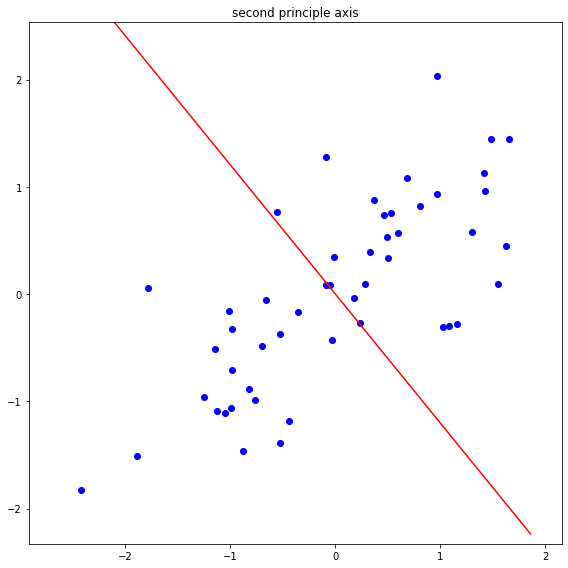

In [205]:
function_result_04()

In [206]:
def function_result_05():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(x,y,c='blue')

    axes = plt.subplot(111)
    


    x_value = [0,principal_component_1[0]]
    y_value = [0,principal_component_1[1]]

    x_lim = axes.get_xlim()
    y_lim = axes.get_ylim()
    
    x_extt = np.linspace(x_lim[0],x_lim[1],100)
    poly = np.polyfit(x_value,y_value,deg=1) 
    y_extt = np.poly1d(poly)(x_extt)

    axes.plot(x_extt,y_extt,'r')
    #axes.plot(x_value,y_value,color='r')
    plt.scatter(projection1[:,0],projection1[:,1],color="g",zorder=111)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()


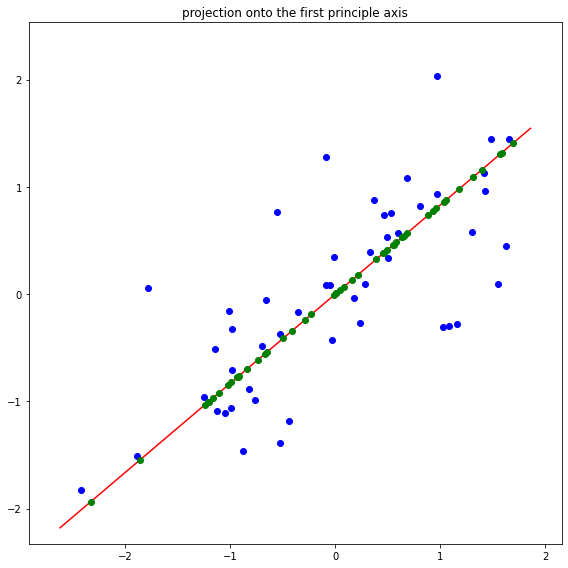

In [207]:
function_result_05()

In [208]:
def function_result_06():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(x, y, c = 'blue')

    x_value = [0,principal_component_2[0]]
    y_value = [0,principal_component_2[1]]


    axes = plt.subplot(111)
    x_lim = axes.get_xlim()
    y_lim = axes.get_ylim()
    
    x_extt = np.linspace(x_lim[0],x_lim[1],100)
    poly = np.polyfit(x_value,y_value,deg=1) 
    y_extt = np.poly1d(poly)(x_extt)

    axes.plot(x_extt,y_extt,'r')


    plt.scatter(projection2[:,0],projection2[:,1],color="g",zorder=111)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

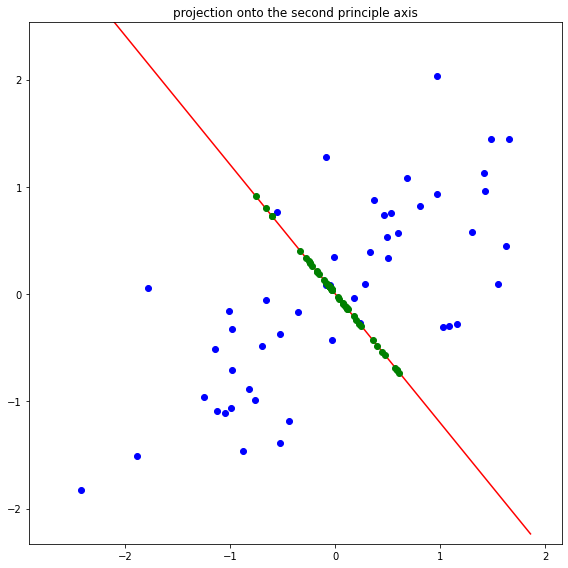

In [209]:
function_result_06()

In [210]:
def function_result_07():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    axes = plt.subplot(111)
    plt.scatter(x,y,c='blue')



    x_value = [0,principal_component_1[0]]
    y_value = [0,principal_component_1[1]]
    
    x_lim = axes.get_xlim()
    y_lim = axes.get_ylim() 

    x_extt = np.linspace(x_lim[0],x_lim[1],100)
    poly = np.polyfit(x_value,y_value,deg=1)
    y_extt = np.poly1d(poly)(x_extt)
    axes.plot(x_extt,y_extt,'r')

    plt.scatter(projection1[:,0],projection1[:,1],color="g",zorder=111)

    z = np.array([x,y]).T
    for index in range(number_data):
        #각각에 대하여 
        weight = np.array([z[index][0],z[index][1]])
        axes.plot([weight[0],projection1[index][0]],[weight[1],projection1[index][1]],color="black")
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

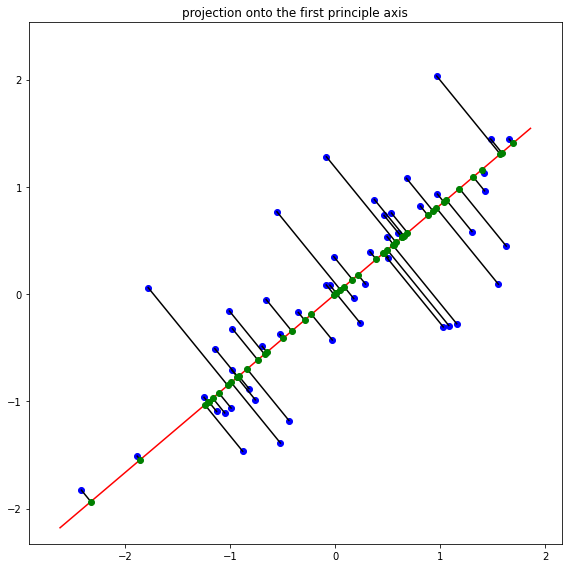

In [211]:
function_result_07()

In [212]:
def function_result_08():

    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    axes = plt.subplot(111)
    plt.scatter(x,y,c='blue')

    x_value = [0,principal_component_1[0]]
    y_value = [0,principal_component_1[1]]

    
    plt.scatter(projection1[:,0],projection1[:,1],color="g",zorder=111)


    x_lim = axes.get_xlim()
    y_lim = axes.get_ylim() 

    x_extt = np.linspace(x_lim[0],x_lim[1],100)
    poly = np.polyfit(x_value,y_value,deg=1)
    y_extt = np.poly1d(poly)(x_extt)
    axes.plot(x_extt,y_extt,'r')
    
    z = np.array([x,y]).T
    for index in range(number_data):
        #각각에 대하여 
        weight = np.array([z[index][0],z[index][1]])
        axes.plot([weight[0],projection1[index][0]],[weight[1],projection1[index][1]],color="black")    


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

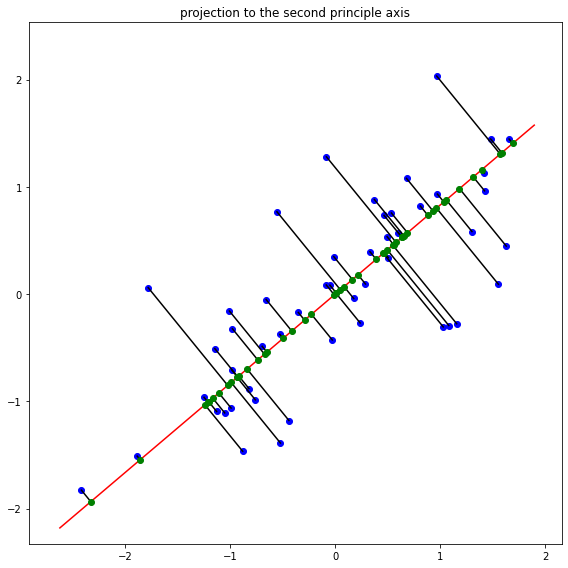

In [213]:
function_result_08()

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************


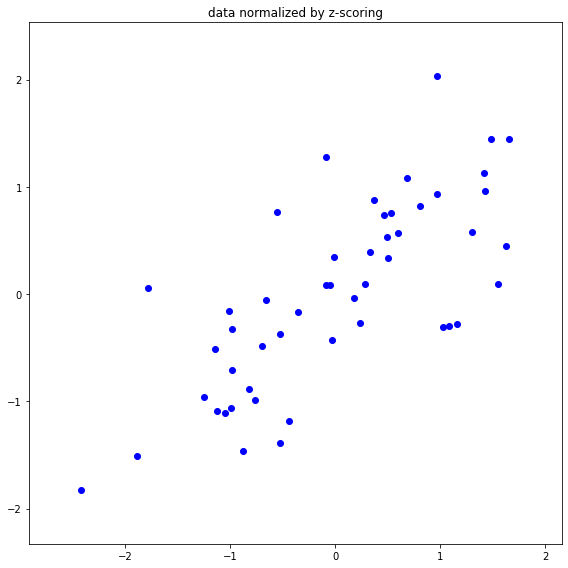

**************************************************
## [RESULT 02]
**************************************************


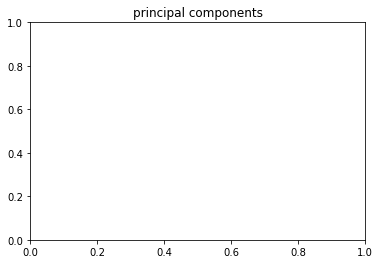

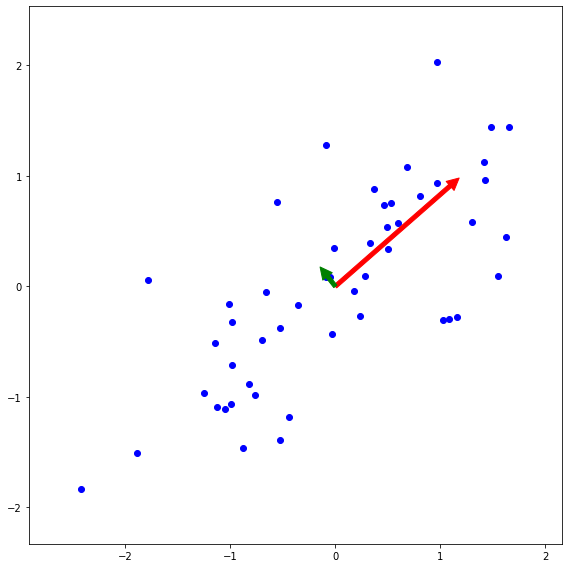

**************************************************
## [RESULT 03]
**************************************************


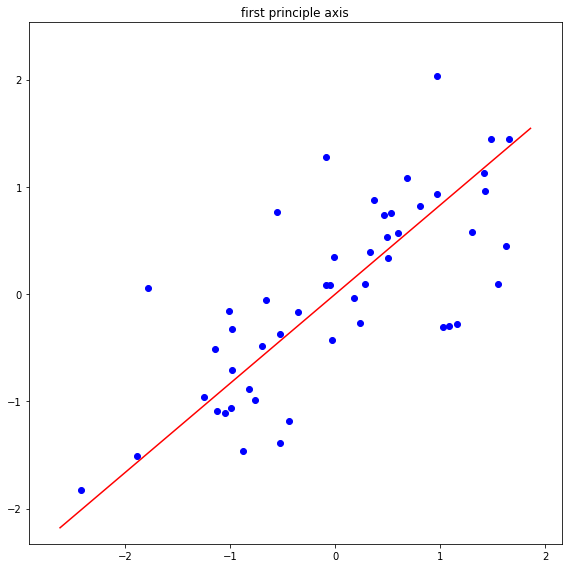

**************************************************
## [RESULT 04]
**************************************************


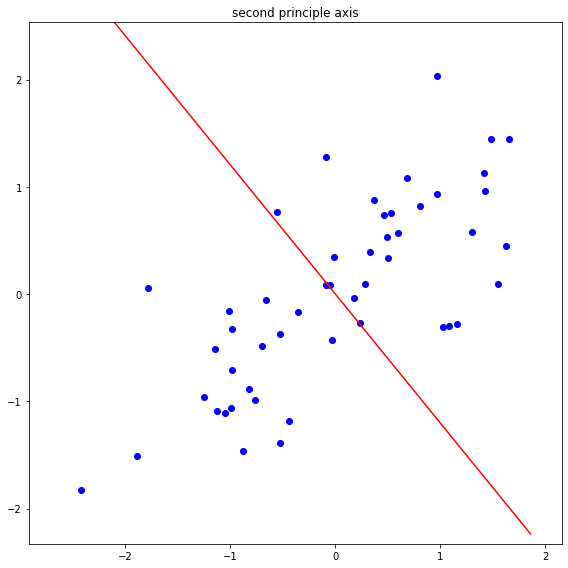

**************************************************
## [RESULT 05]
**************************************************


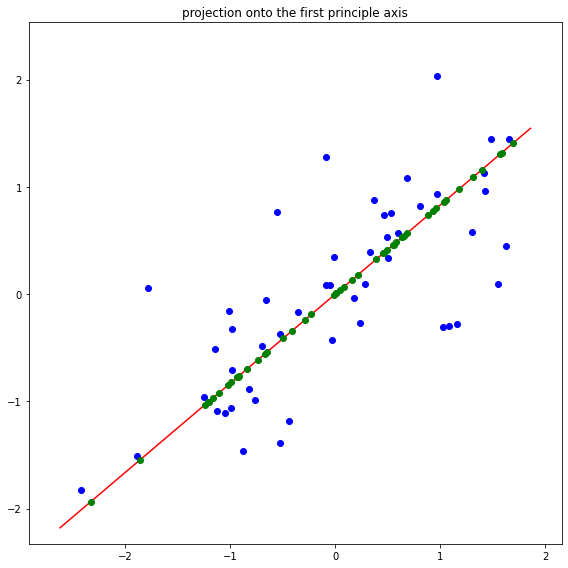

**************************************************
## [RESULT 06]
**************************************************


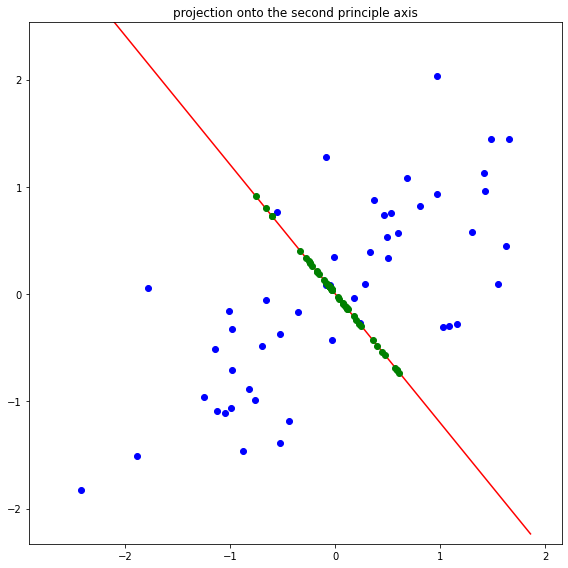

**************************************************
## [RESULT 07]
**************************************************


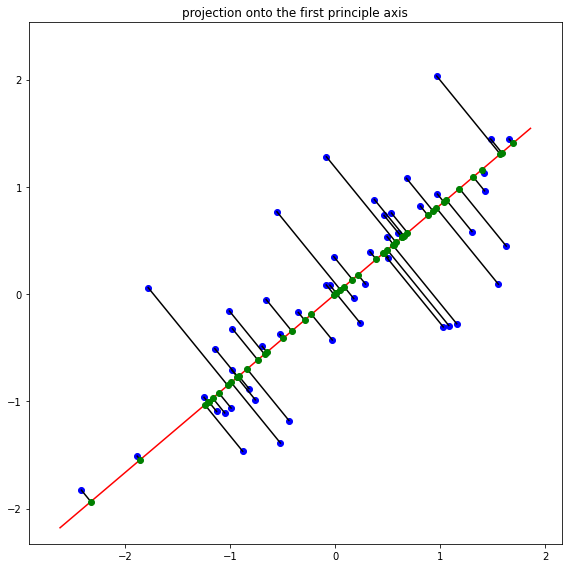

**************************************************
## [RESULT 08]
**************************************************


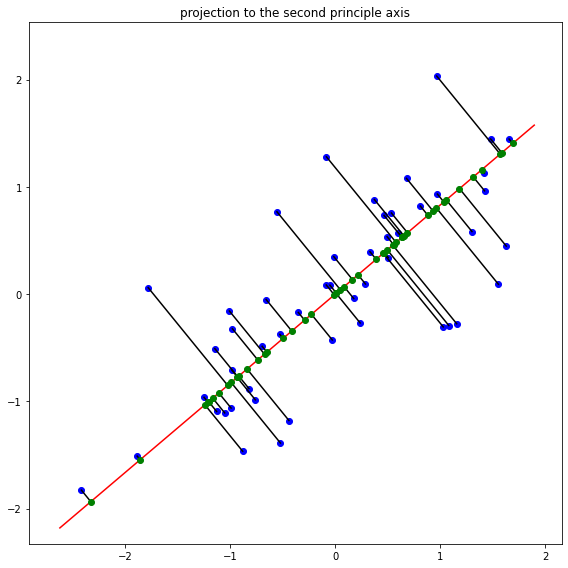

In [214]:
number_result = 8

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)